# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [50]:
# loading relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [51]:
df = pd.read_csv("Cleaned_Craft_Data.csv", encoding="ISO-8859-1")

df.head()

,Event.Date,Injury.Severity,Aircraft.Damage,Make,Model,Amateur.Built,Number.Of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.Of.Flight,Purpose.Of.Flight,Total.Occupants,Fatal.Serious.Injuries,Fatal.Serious.Injury.Percent,Aircraft.Destroyed,Make.Model
0,1983-01-01,Non-Fatal,Substantial,Cessna,182P,No,1.0,Reciprocating,0.0,0.0,1.0,3.0,VMC,Approach,Personal,4.0,0.0,0.0,0,Cessna 182P
1,1983-01-01,Non-Fatal,Substantial,Cessna,182RG,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Landing,Personal,2.0,0.0,0.0,0,Cessna 182RG
2,1983-01-01,Non-Fatal,Substantial,Cessna,182P,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Takeoff,Personal,1.0,0.0,0.0,0,Cessna 182P
3,1983-01-01,Non-Fatal,Substantial,Piper,PA-28R-200,No,1.0,Reciprocating,0.0,0.0,2.0,0.0,VMC,Approach,Personal,2.0,0.0,0.0,0,Piper PA-28R-200
4,1983-01-01,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC,Landing,Instructional,2.0,0.0,0.0,0,Cessna 140


## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [52]:
small_aircraft = df[df["Total.Occupants"] <= 20]  # Small aircraft (20 or fewer passengers)
large_aircraft = df[df["Total.Occupants"] > 20]

num_large_aircraft = large_aircraft.shape[0]
num_small_aircraft = small_aircraft.shape[0]
print(f"Number of large aircraft (with more than 20 occupants): {num_large_aircraft}")
print(f"Number of small aircrafts (less than 20 occupants): {num_small_aircraft}")

Number of large aircraft (with more than 20 occupants): 1924
Number of small aircrafts (less than 20 occupants): 62411


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

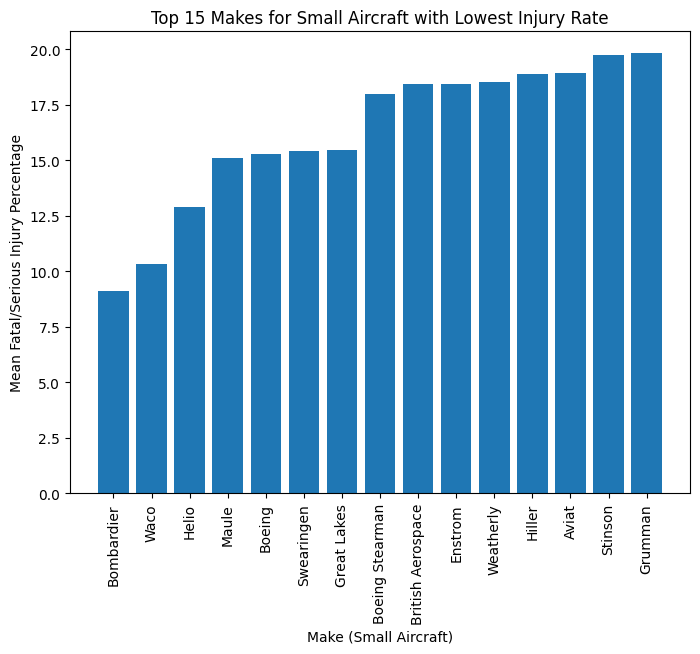

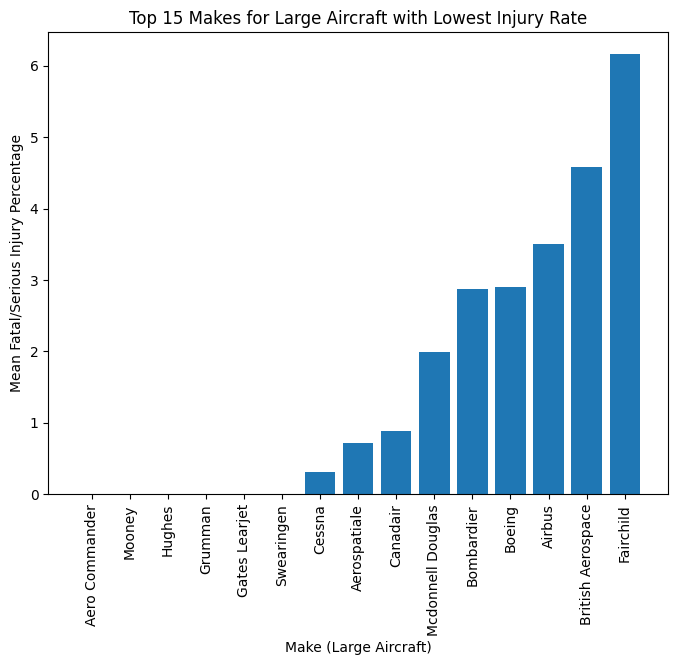

In [53]:
make_injury_rate = df.groupby("Make")["Fatal.Serious.Injury.Percent"].mean()
small_aircraft_injury_rate = small_aircraft.groupby('Make')['Fatal.Serious.Injury.Percent'].mean().sort_values().head(15) #sory by small aircraft type and injury percentage
large_aircraft_injury_rate = large_aircraft.groupby('Make')['Fatal.Serious.Injury.Percent'].mean().sort_values().head(15)#sort by large aircraft type and injury percentage
 
#small aircraft injury rate
plt.figure(figsize=(8, 6))
plt.bar(small_aircraft_injury_rate.index, small_aircraft_injury_rate.values) #notes to self: .index: Gets the named indices for Series and for rows of DataFrame, .values: returns the data contained within the series/df as an array
#create labels
plt.title("Top 15 Makes for Small Aircraft with Lowest Injury Rate")
plt.xlabel('Make (Small Aircraft)')
plt.ylabel('Mean Fatal/Serious Injury Percentage')
plt.xticks(rotation=90) #to fix labels on x axis
#show bar plot
plt.show()

#large aicract injury rate
plt.figure(figsize=(8, 6))
plt.bar(large_aircraft_injury_rate.index, large_aircraft_injury_rate.values)
#create labels
plt.title("Top 15 Makes for Large Aircraft with Lowest Injury Rate")
plt.xlabel('Make (Large Aircraft)')
plt.ylabel('Mean Fatal/Serious Injury Percentage')
plt.xticks(rotation=90)  #to fix labels on x-axis
#show bar plot
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

count    1920.000000
mean       15.328899
std        34.033573
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: Fatal.Serious.Injury.Percent, dtype: float64
14      0.0
61      0.0
89      0.0
188    25.0
236     0.0
243     0.0
287     0.0
338    10.0
440     0.0
448     0.0
Name: Fatal.Serious.Injury.Percent, dtype: float64


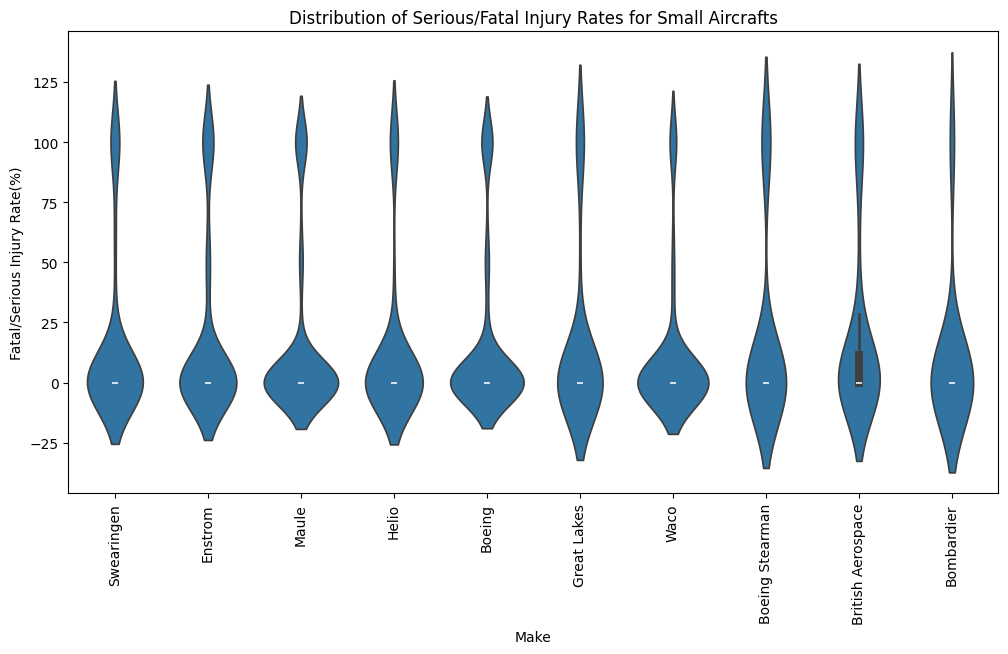

In [54]:
top_10_small_aircraft_injury_rate = small_aircraft.groupby('Make')['Fatal.Serious.Injury.Percent'].mean().sort_values().head(10)
#data needs to be turned into a df so can be plotted
top_10_small_aircraft_data = small_aircraft[small_aircraft['Make'].isin(top_10_small_aircraft_injury_rate.index)]

print(top_10_small_aircraft_data['Fatal.Serious.Injury.Percent'].describe())
print(top_10_small_aircraft_data["Fatal.Serious.Injury.Percent"].head(10)) #for me to see the data

plt.figure(figsize=(12, 6))
sns.violinplot(top_10_small_aircraft_data, x = "Make", y = "Fatal.Serious.Injury.Percent")

# Add title and labels
plt.title('Distribution of Serious/Fatal Injury Rates for Small Aircrafts')
plt.xlabel("Make")
plt.ylabel('Fatal/Serious Injury Rate(%)')
plt.xticks(rotation=90)

plt.show()


**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

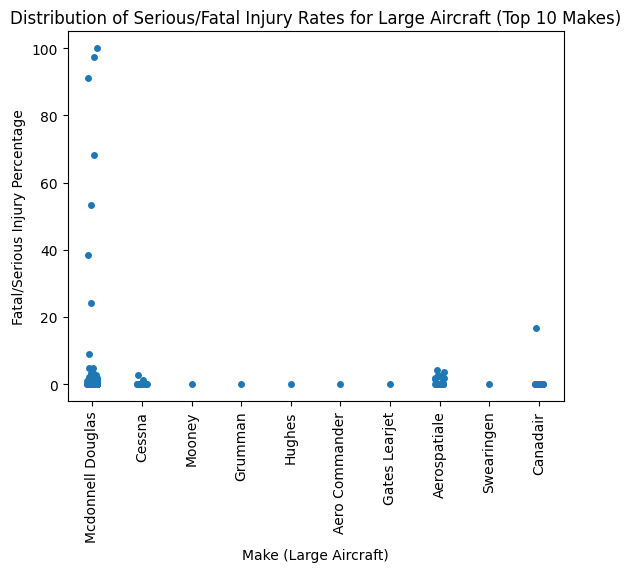

In [55]:
top_10_large_aircraft_injury_rate = large_aircraft.groupby("Make")["Fatal.Serious.Injury.Percent"].mean().sort_values().head(10)

top_10_large_aircraft_data = large_aircraft[large_aircraft["Make"].isin(top_10_large_aircraft_injury_rate.index)]

sns.stripplot(data=top_10_large_aircraft_data, x="Make", y="Fatal.Serious.Injury.Percent", jitter = True) # need jitter to spread out dots a bit
#labels and spacing
plt.title("Distribution of Serious/Fatal Injury Rates for Large Aircraft (Top 10 Makes)")
plt.xlabel("Make (Large Aircraft)")
plt.ylabel("Fatal/Serious Injury Percentage")
plt.xticks(rotation=90)

plt.show()



**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [56]:
# For small aircraft
small_aircraft["Destruction.Rate"] = (small_aircraft["Aircraft.Damage"] == "Destroyed") #need a column Desctruction rate

# For large aircraft
large_aircraft["Destruction.Rate"] = (large_aircraft["Aircraft.Damage"] == "Destroyed")

# Calculate mean destruction rate per Make
small_aircraft_destruction_rate = small_aircraft.groupby("Make")["Destruction.Rate"].mean()
large_aircraft_destruction_rate = large_aircraft.groupby("Make")["Destruction.Rate"].mean()

# Sort and keep the lowest 15 destruction rates for small and large aircraft
small_aircraft_destruction_rate_sorted = small_aircraft_destruction_rate.sort_values().head(15)
large_aircraft_destruction_rate_sorted = large_aircraft_destruction_rate.sort_values().head(15)

# print("Small Aircraft Mean Destruction Rate")
# print(small_aircraft_destruction_rate_sorted)
print("\nLarge Aircraft Mean Destruction Rate")
print(large_aircraft_destruction_rate_sorted)



Large Aircraft Mean Destruction Rate
Make
Aero Commander       0.000000
Mooney               0.000000
Hughes               0.000000
Grumman              0.000000
Gates Learjet        0.000000
Swearingen           0.000000
Aerospatiale         0.000000
Bombardier           0.023256
Boeing               0.028128
Mcdonnell Douglas    0.028369
Airbus               0.033493
British Aerospace    0.043478
Embraer              0.045977
Canadair             0.052632
Cessna               0.076923
Name: Destruction.Rate, dtype: float64


/var/folders/hq/0d2ft2dx2xx1hw4vlltc8v7h0000gn/T/ipykernel_12000/1112916995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_aircraft["Destruction.Rate"] = (small_aircraft["Aircraft.Damage"] == "Destroyed") #need a column Desctruction rate
/var/folders/hq/0d2ft2dx2xx1hw4vlltc8v7h0000gn/T/ipykernel_12000/1112916995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  large_aircraft["Destruction.Rate"] = (large_aircraft["Aircraft.Damage"] == "Destroyed")


#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

In [ ]:
#The main takeaway from the above analysis is that smaller aircrafts have a higher injury rate and a higher destruction rate which, unsurprisingly,
#indicates that they are safer and better bets for survivabiliry. Let's look at the first 2 bar charts that we made. Even the lowest (serious/fatal) 
# injury rate for small aircrafts was above 0% while we had a number of large aircrafts that had 0% serious/fatal injur rates. Let's look at the below data:

print(top_10_small_aircraft_data["Fatal.Serious.Injury.Percent"].describe())

print(top_10_large_aircraft_data["Fatal.Serious.Injury.Percent"].describe())

#A few statistic stick out. Firstly, let's just look at the counts themselves! Only 351 of the accidents for large aircrafts had serious/fatal injuries vs 1,920!
#Now, let's take a look at the two means: for fatal/serious injury% the mean is only 1.72%, again implying the rarity of a serious/fatal accident. On the otherside (with small aircrafts),
# the mean is 15.33%! That implies that over 14% of accidents result in fatal/serious injury. I will note tha the standard deviation is quite high, but that appears to be because it seems if 
#there is a fatal accident, most often all passengers are injured (ie we have a wide range of outcomes meaning a lot of 0s and 100%). Reviewing this data the biggest takeaway is that large
#planes are much safer and small planes should be avoided (if at all possible).

count    1920.000000
mean       15.328899
std        34.033573
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       100.000000
Name: Fatal.Serious.Injury.Percent, dtype: float64
count    351.000000
mean       1.717571
std       10.276959
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      100.000000
Name: Fatal.Serious.Injury.Percent, dtype: float64


### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

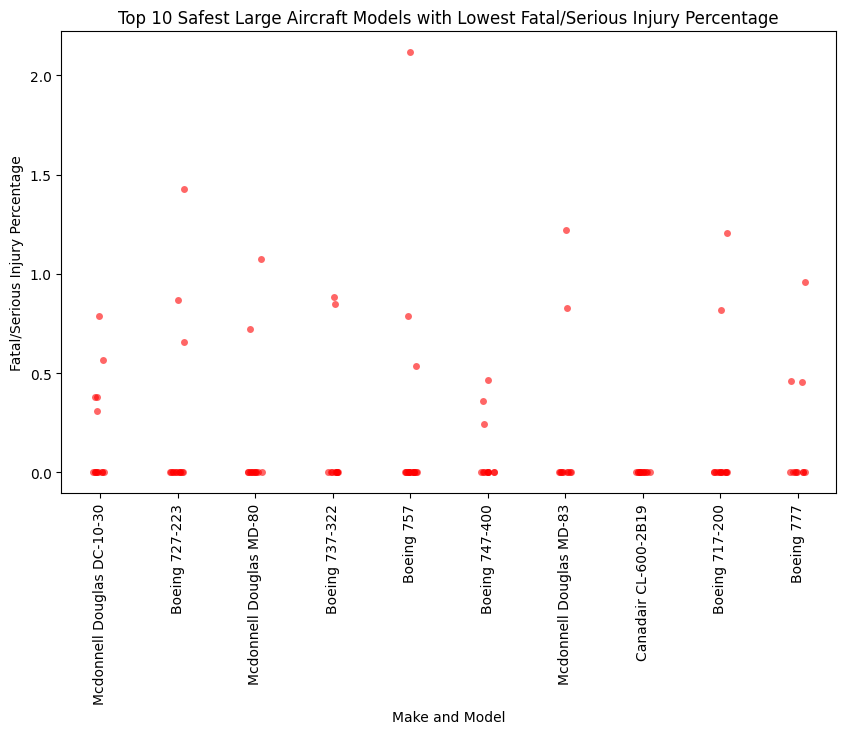

In [58]:
large_aircraft_counts = large_aircraft['Make.Model'].value_counts()

# Filter to include only 'Make.Model' combinations that appear at least 10 times
valid_large_aircraft = large_aircraft[large_aircraft['Make.Model'].isin(large_aircraft_counts[large_aircraft_counts >= 10].index)]

# Calculate the mean Fatal/Serious Injury Percentage for valid small aircraft
mean_injury_rate_large = valid_large_aircraft.groupby('Make.Model')['Fatal.Serious.Injury.Percent'].mean()

# Get the 10 makes/models with the lowest fatal/serious injury percentages
top_10_lowest_large_aircraft_injury_rate = mean_injury_rate_large.nsmallest(10)
top_10_large_aircraft_data = valid_large_aircraft[valid_large_aircraft['Make.Model'].isin(top_10_lowest_large_aircraft_injury_rate.index)]

# Plot the top 10 safest small aircraft models (lowest fatal/serious injury percentages)
plt.figure(figsize=(10, 6))
sns.stripplot(x='Make.Model', y='Fatal.Serious.Injury.Percent', data=top_10_large_aircraft_data, jitter=True, color='red', alpha=0.6)
plt.title("Top 10 Safest Large Aircraft Models with Lowest Fatal/Serious Injury Percentage")
plt.xlabel("Make and Model")
plt.ylabel("Fatal/Serious Injury Percentage")
plt.xticks(rotation=90)
plt.show()



**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

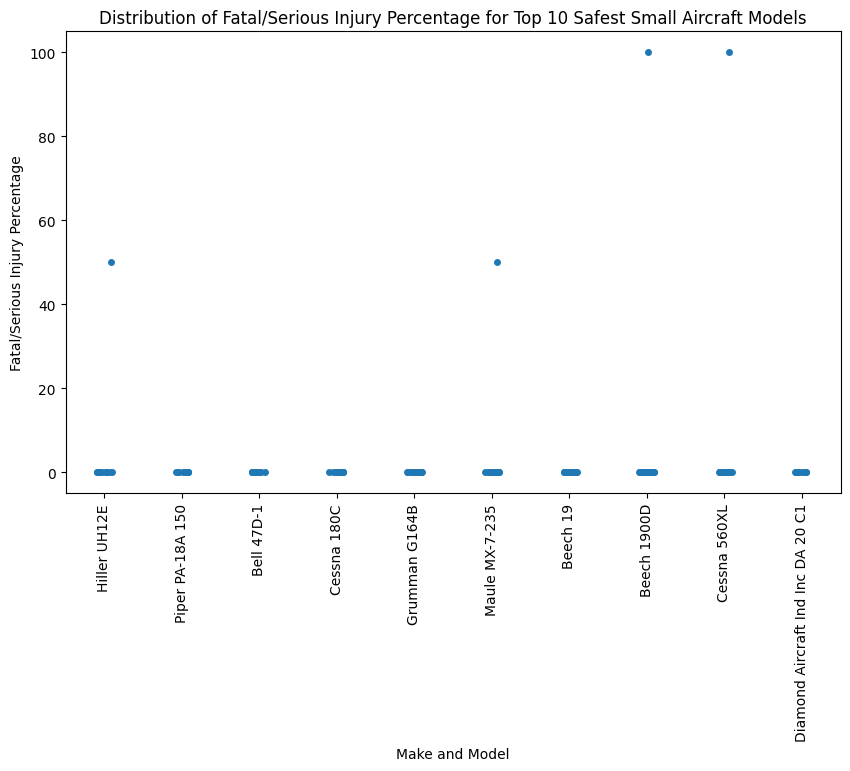

In [59]:
small_aircraft_counts = small_aircraft['Make.Model'].value_counts()

# Filter to include only 'Make.Model' combinations that appear at least 10 times
valid_small_aircraft = small_aircraft[small_aircraft['Make.Model'].isin(small_aircraft_counts[small_aircraft_counts >= 10].index)]

# Calculate the mean Fatal/Serious Injury Percentage for valid small aircraft
mean_injury_rate_small = valid_small_aircraft.groupby('Make.Model')['Fatal.Serious.Injury.Percent'].mean()

# Get the 10 makes/models with the lowest fatal/serious injury percentages
top_10_lowest_small_aircraft_injury_rate = mean_injury_rate_small.nsmallest(10)
top_10_small_aircraft_data = valid_small_aircraft[valid_small_aircraft['Make.Model'].isin(top_10_lowest_small_aircraft_injury_rate.index)]

# Plot the top 10 safest small aircraft models (lowest fatal/serious injury percentages)
plt.figure(figsize=(10, 6))
sns.stripplot(x='Make.Model', y='Fatal.Serious.Injury.Percent', data=top_10_small_aircraft_data)
plt.title("Distribution of Fatal/Serious Injury Percentage for Top 10 Safest Small Aircraft Models")
plt.xlabel("Make and Model")
plt.ylabel("Fatal/Serious Injury Percentage")
plt.xticks(rotation=90)
plt.show()

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

In [60]:
#This is very interesting! Clearly the data shows that small aircrafts are much more dangerous, however, there are 6 models that (with at least 10 datapoints) have not produced any serious or fatal injuries. 
#That does not mean that flying a small aircraft is safer, but if I was to recommend small crafts, I would suggest the Beech 19, Bell 47D-1, Cessna 180C, Diamond Aircraft Ind Inc DA 20 C1, Grumman G164B, and
# the Piper PA-18A 150 models.The large aircrafts are again showing signs of being much safer. We are talking miniscule percentages. Again, my suggestion would be to avoid small planes if possible and only fly
#on larger crafts.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.

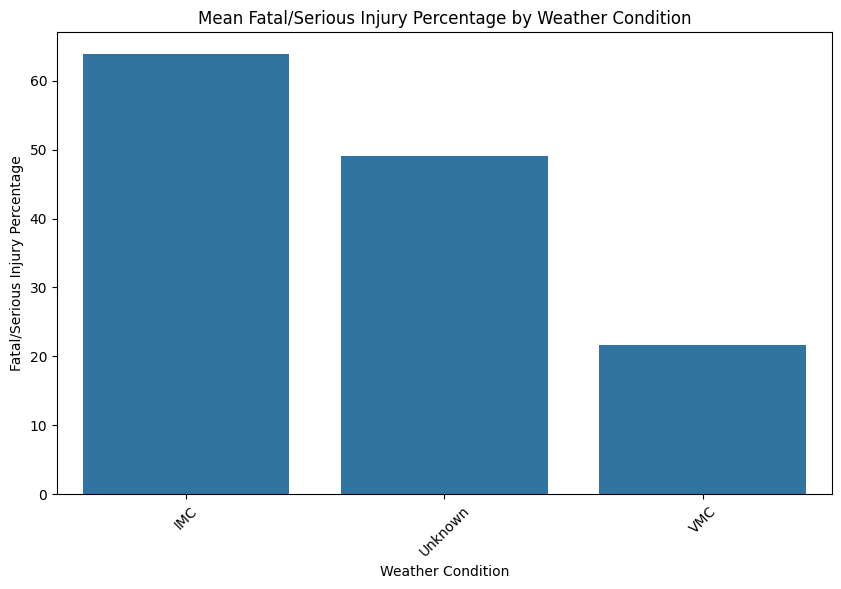

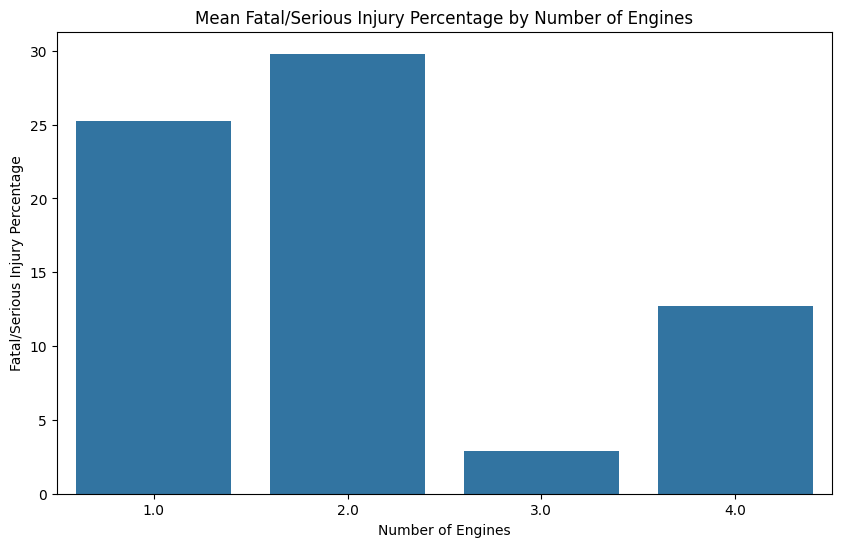

In [61]:
weather_condition_counts = df['Weather.Condition'].value_counts()

# Group by 'Weather.Condition' and calculate the mean fatal/serious injury percentage
weather_injury_rate = df.groupby('Weather.Condition')['Fatal.Serious.Injury.Percent'].mean()

# Plot a barplot for weather conditions vs mean injury percentage
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_injury_rate.index, y=weather_injury_rate.values)
plt.title("Mean Fatal/Serious Injury Percentage by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Fatal/Serious Injury Percentage")
plt.xticks(rotation=45)
plt.show()

#Let's briefly talk about the weather condition section. I wanted to bring this particular variable up because in this case we have a bunch of unknown values. So this brings up the question, even though we have 
#unknown values, can we make an intelligent interpretation of the data. I would aruge that we can. Firstly, let's look at what these two categories (outside of the unkown) are: IMC and VMC. IMC stands for 
# "Instrument Meteorological Condition". What this means is that the conditions are severe enough that the pilot cannot safely navigate with their sight, but must rely on instruments for navigation.
# VMC stands for "Visual Meteorological Conditions" which means that pilots are able to navigate by sight. VMC conditions allow for sufficient visibility to see and avoid other aircrafts and terrain while
# IMC conditions (such as severe clouds) do not allow for that visibility. If we look at the data (simply IMC and VMC), we can see that the rate at which accidents happened in "bad" weather (IMC) conditions was much 
#higher than that of "good" weather (VMC). I think we can safely assume that flying in IMC conditions leads to more severe accidents.

engine_number_injury_rate = df.groupby('Number.Of.Engines')['Fatal.Serious.Injury.Percent'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=engine_number_injury_rate.index, y=engine_number_injury_rate.values)
plt.title("Mean Fatal/Serious Injury Percentage by Number of Engines")
plt.xlabel("Number of Engines")
plt.ylabel("Fatal/Serious Injury Percentage")
plt.xticks(rotation=0)
plt.show()

# I look at a plane having 1 or 2 engines having a higher rate of severe injury to that of 3 or more. If we think about this logically, the more engines 
#that a plan has, the stronger capabilities in the case of failure. However, we must also be aware of other potentail factors such as pilot experience or the level of maintenance on the aircraft to be able to draw an 
#exact correlation. However, I think that we can assume that having more engines as opposed to less does increase safety to a degree. In order to fully analyze this we would need more data points. I would strictly make
#a reccomendation based on this datapoint. In general flight safety is not a black and white thing. There are many factors that could paly a role in why or why not a an aircraft has a severe accident.